# I. Introduction : 

L'objectif de ce notebook est de présenter les données disponibles et de les nettoyer pour préparer la classification.

## Présentation des données : 

Échantillon : Patients atteints de troubles psychiatriques majeurs (schizophrénie, troubles anxieux, troubles de l'humeur, etc.) et témoins sains.
### Type de données :
* EEG : Enregistrements en état de repos avec 19 électrodes (système international 10-20).
* Métriques extraites :
    * Densité spectrale de puissance (PSD) : Activité locale par bande de fréquence (Delta, Theta, Alpha, Beta, Gamma).
    * Cohérence fonctionnelle (FC) : Connectivité entre paires d'électrodes.
* Autres variables : Âge, sexe, niveau d'éducation, QI, diagnostics cliniques.
* Objectif : Identifier des biomarqueurs EEG pour différencier les troubles psychiatriques via des modèles d'apprentissage automatique.

## Prétraitement des données :
* Gestion des valeurs manquantes : Imputation ou suppression des données incomplètes.
* Normalisation : Mise à l'échelle des mesures EEG et des variables continues.
* Encodage : Transformation des variables catégoriques (ex. : sexe, diagnostic) en format numérique.
* Détection des anomalies : Identification et gestion des outliers.
* Structure des données : Vérification et alignement des colonnes pour l'analyse.

#

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
file_path=r"EEG.machinelearing_data_BRMH.csv"
df=pd.read_csv(file_path)
df.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


La nomenclature des colonnes est la suivante : Métrique - Bande - Zone.

Exemple : AB.A.delta.a.FP1 : Puissance absolue dans la bande Delta pour l'électrode FP1 (région frontale gauche).

### Gestion des valeurs manquantes 

In [4]:
cols_with_na=df.columns[df.isna().any()] # Obtenir les colonnes avec des valeurs manquantes
print(df[cols_with_na].isna().sum()) # Obtenir Nombre de valeurs manquantes dans ces colonnes
df=df.drop(columns=["Unnamed: 122","no.","eeg.date"]) #Retirer la colonne vide et les colonnes inutiles 
df=df.dropna() # Retirer les lignes avec des valeurs manquantes 
print(df.shape) # Vérifier la dimension de la nouvelle dataframe

education        15
IQ               13
Unnamed: 122    945
dtype: int64
(919, 1146)


In [5]:
df.to_csv(r"C:\Users\mhama\OneDrive\Documents\Projet_EEG\clean_data_2.csv",index=False) # Export des données nettoyées. 

### Effectifs par pathologie : 

In [8]:
disorders = [d for d in df["main.disorder"].unique() if d != "Healthy control"]
num_healthy = df[df["main.disorder"] == "Healthy control"].shape[0]
print(f"\nNombre de Contrôles Sains : {num_healthy}")

results = []

for disorder in disorders:
    num_patients = df[df["main.disorder"] == disorder].shape[0]
    results.append({
        "Trouble": disorder,
        "Contrôles Sains": num_healthy,
        "Patients": num_patients
    })

df_counts = pd.DataFrame(results)
df_counts



Nombre de Contrôles Sains : 93


,Trouble,Contrôles Sains,Patients
0,Addictive disorder,93,178
1,Trauma and stress related disorder,93,123
2,Mood disorder,93,262
3,Obsessive compulsive disorder,93,40
4,Schizophrenia,93,117
5,Anxiety disorder,93,106


On constate des classes équilibrées pour l'anxiété, la schizophrénie et les traumatismes tandis que pour les troubles de l'humeur, les addictions et les troubles obsessionnels compulsifs on a des classes relativement plus déséquilibrées.

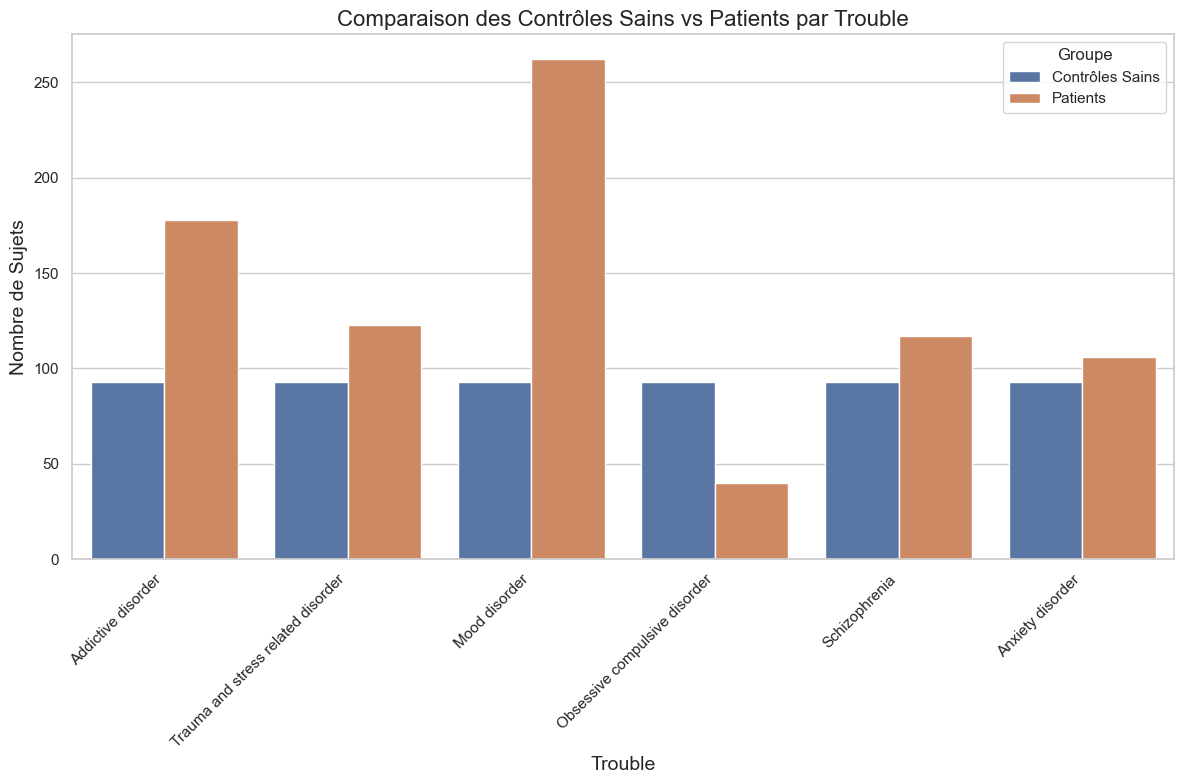

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Transformer les données pour la visualisation
df_melted = df_counts.melt(id_vars='Trouble', value_vars=['Contrôles Sains', 'Patients'],
                           var_name='Groupe', value_name='Nombre')

# Configurer le style de seaborn
sns.set(style="whitegrid")

# Définir la taille de la figure
plt.figure(figsize=(12, 8))

# Créer le barplot
sns.barplot(x='Trouble', y='Nombre', hue='Groupe', data=df_melted)

# Ajouter des titres et labels
plt.title('Comparaison des Contrôles Sains vs Patients par Trouble', fontsize=16)
plt.xlabel('Trouble', fontsize=14)
plt.ylabel('Nombre de Sujets', fontsize=14)

# Ajuster la rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher la légende
plt.legend(title='Groupe')

# Ajuster les marges pour éviter que les labels ne soient coupés
plt.tight_layout()

# Sauvegarder le plot sous forme d'image (optionnel)
# plt.savefig('comparaison_healthy_vs_patients.png', dpi=300)

# Afficher le plot
plt.show()